In [67]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv(r"../data/attrition_data_with_calculated_columns.csv")
df.drop(['EMP_ID', 'TERMINATION_YEAR', 'COMBINED_JOB_GROUP', 'DISCRETIZED_ANNUAL_RATE', 'DISCRETIZED_AGE', 'PREVYR_1_PRESENT', 'PREVYR_2_PRESENT', 'PREVYR_3_PRESENT', 'PREVYR_4_PRESENT', 'PREVYR_5_PRESENT'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [69]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [70]:
x = pd.get_dummies(x, columns=['ETHNICITY', 'REFERRAL_SOURCE', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [71]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [73]:
from sklearn import metrics
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7763522884882108


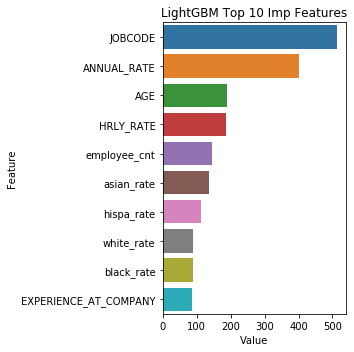

In [74]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,x.columns)), columns=['Value','Feature'])
feature_imp_top_10 = feature_imp.sort_values(by = 'Value',ascending=False).reset_index(drop=True)[:10]
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp_top_10)
plt.title('LightGBM Top 10 Imp Features')
plt.tight_layout()
plt.savefig('LightGBM important features', dpi=150)
plt.show()

In [75]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

<Figure size 432x288 with 0 Axes>

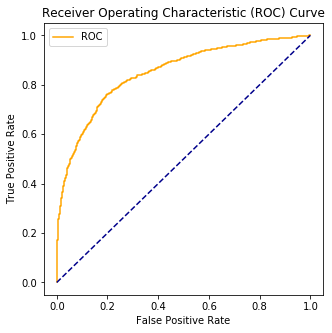

In [80]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.savefig('LightGBM ROC', dpi=150)
plt.legend(loc=0)

In [77]:
confusion_matrix(y_test, y_pred)

array([[1372,  253],
       [ 392,  867]])